In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [95]:
col_name='RSI'
ratio_outlier=0.1  # 5% max is 0.5 (50%)
upX=65
downX=35

In [96]:
df = pd.read_csv('data/SET50-Indy-Week.csv',parse_dates=['Date/Time'],dayfirst=True,usecols=['Date/Time',col_name])
df.rename(columns={'Date/Time':'Date'},inplace=True)
df.set_index('Date',inplace=True)
df.head(10)

,RSI
Date,
2009-01-09,41.76
2009-01-16,36.74
2009-01-23,36.28
2009-01-30,37.57
2009-02-06,40.24
2009-02-13,40.61
2009-02-20,37.37
2009-02-27,37.01
2009-03-06,33.83


Text(0.5, 0, 'RSI distribution')

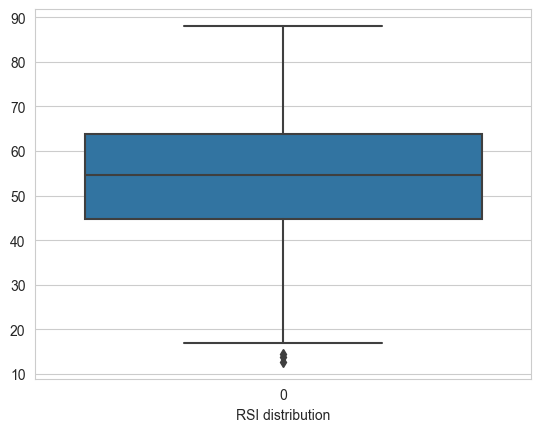

In [97]:
sns.set_style("whitegrid")
ax = sns.boxplot(data=df[col_name])
ax.set_xlabel(f'{col_name} distribution')

In [98]:
#model=IsolationForest(n_estimators=100, max_samples='auto', contamination='auto')  #contamination=float(ratio_outlier)
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(ratio_outlier))  
model.fit(df[[col_name]])

df['scores']=model.decision_function(df[[col_name]])
df['anomaly']=model.predict(df[[col_name]])

D:\ProgramData\Anaconda3\envs\ml-ai\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


32
              RSI    scores  anomaly
Date                                
2009-05-29  80.26 -0.009436       -1
2009-06-05  85.87 -0.117182       -1
2009-06-12  88.04 -0.168521       -1
2009-10-02  80.31 -0.015183       -1
2009-10-09  83.09 -0.076383       -1
2010-04-02  77.68 -0.013345       -1
2010-09-03  80.16 -0.005261       -1
2010-09-24  81.17 -0.035681       -1
2010-10-01  84.43 -0.100556       -1
2010-10-08  77.35 -0.012388       -1
2010-10-15  81.74 -0.052944       -1
2010-10-22  77.79 -0.013768       -1
2010-11-05  80.76 -0.027207       -1
2012-02-24  76.81 -0.000401       -1
2012-03-30  80.09 -0.002971       -1
2012-12-28  76.73 -0.000401       -1
2013-02-01  83.46 -0.083085       -1
2013-02-08  77.71 -0.013345       -1
2013-02-22  80.79 -0.027207       -1
2013-03-08  82.19 -0.066469       -1
2013-03-15  85.02 -0.100441       -1
2017-09-08  78.52 -0.003452       -1
2017-09-15  82.68 -0.075003       -1
2017-09-29  81.55 -0.044872       -1
2017-10-06  84.15 -0.096050       -

<AxesSubplot: xlabel='RSI', ylabel='Count'>

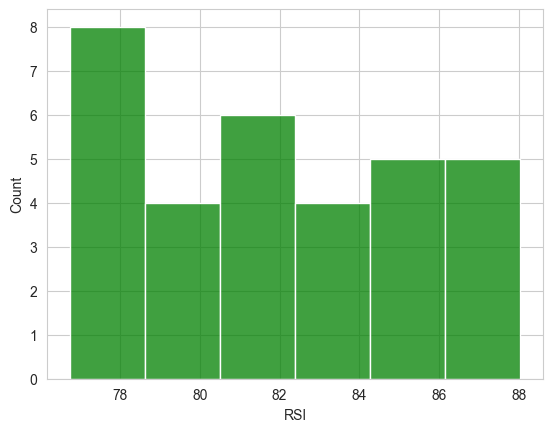

In [99]:
upAnomaly=df.query(f'anomaly==-1 and {col_name}>@upX')
print(len(upAnomaly))
print(upAnomaly)
sns.set_style('whitegrid')
sns.histplot(upAnomaly[col_name], kde = False, color ='green')

41
              RSI    scores  anomaly
Date                                
2011-09-23  31.48 -0.009638       -1
2011-09-30  26.85 -0.051561       -1
2011-10-07  26.81 -0.051561       -1
2013-08-23  32.47 -0.013767       -1
2013-08-30  28.97 -0.021181       -1
2014-01-03  25.76 -0.060284       -1
2015-07-24  28.92 -0.023858       -1
2015-08-07  29.20 -0.024801       -1
2015-08-14  26.78 -0.051561       -1
2015-08-21  20.01 -0.146651       -1
2015-08-28  24.35 -0.065951       -1
2015-09-04  24.09 -0.071481       -1
2015-09-11  27.00 -0.049310       -1
2015-09-18  30.76 -0.023802       -1
2015-09-25  27.47 -0.043890       -1
2015-10-02  22.80 -0.097445       -1
2015-12-04  31.67 -0.013528       -1
2015-12-11  25.12 -0.066773       -1
2015-12-18  24.76 -0.063252       -1
2015-12-25  24.54 -0.062434       -1
2015-12-30  24.27 -0.067223       -1
2016-01-08  18.76 -0.152411       -1
2016-01-15  18.20 -0.163711       -1
2016-01-22  29.06 -0.022514       -1
2018-06-22  25.01 -0.068047       -

<AxesSubplot: xlabel='RSI', ylabel='Count'>

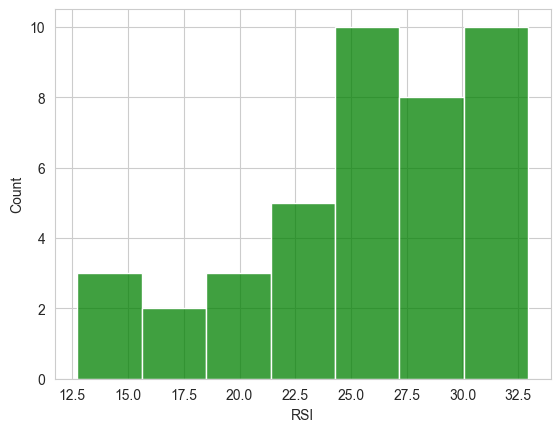

In [100]:
downAnomaly=df.query(f'anomaly==-1 and {col_name}<@downX')
print(len(downAnomaly))
print(downAnomaly)

sns.set_style('whitegrid')
sns.histplot(downAnomaly[col_name], kde = False, color ='green')

In [101]:
all_data=len(df)
all_outlier=len(df.query('anomaly==-1'))
my_outliers=len(upAnomaly)+len(downAnomaly)
                
pct_myOulier=round(my_outliers/all_outlier*100,2)
pct_allOutlier=round(all_outlier/all_data*100,2)
                
print(f"Accuracy percentage: {my_outliers}/{all_outlier}={pct_myOulier} %")
print(f"Outlier percentage: {all_outlier}/{all_data}={pct_allOutlier} %")

Accuracy percentage: 73/73=100.0 %
Outlier percentage: 73/730=10.0 %
